# Basic RNN
- Objective: to understand basics of RNN & LSTM

## Recurrent Neural Networks
- Feedforward neural networks (e.g. MLPs and CNNs) are powerful, but they are not optimized to handle "sequential" data
- In other words, they do not possess "memory" of previous inputs
- For instance, consider the case of translating a corpus. You need to consider the **"context"** to guess the next word to come forward

<img src="http://2.bp.blogspot.com/-9GIdV292xV4/UwOIy6B6koI/AAAAAAAAHi4/X6UGlyHI-_U/s1600/tumblr_ms5qzpFY671r9nm7io1_500.gif" style="width: 500px"/>

<br>
- RNNs are suitable for dealing with sequential format data since they have **"recurrent"** structure
- To put it differently, they keep the **"memory"** of earlier inputs in the sequence
</br>
<img src="http://www.wildml.com/wp-content/uploads/2015/09/rnn.jpg" style="width: 600px"/>

<br>
- However, in order to reduce the number of parameters, every layer of different time steps shares same parameters
</br>

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" style="width: 600px"/>

## Load Dataset

In [44]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [45]:
# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3

In [46]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)

In [47]:
# pad the sequences with zeros 
# padding parameter is set to 'post' => 0's are appended to end of sequences
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')

In [48]:
X_train[0]

array([   1,  245,  273,  207,  156,   53,   74,  160,   26,   14,   46,
        296,   26,   39,   74, 2979, 3554,   14,   46, 4689, 4329,   86,
         61, 3499, 4795,   14,   61,  451, 4329,   17,   12,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0], dtype=int32)

In [49]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [50]:
X_train[0]

array([[   1],
       [ 245],
       [ 273],
       [ 207],
       [ 156],
       [  53],
       [  74],
       [ 160],
       [  26],
       [  14],
       [  46],
       [ 296],
       [  26],
       [  39],
       [  74],
       [2979],
       [3554],
       [  14],
       [  46],
       [4689],
       [4329],
       [  86],
       [  61],
       [3499],
       [4795],
       [  14],
       [  61],
       [ 451],
       [4329],
       [  17],
       [  12],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0]], dtype=int32)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1395, 49, 1)
(599, 49, 1)
(1395,)
(599,)


In [52]:
y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)

In [53]:
y_train = y_data[:1395]
y_test = y_data[1395:]

In [54]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1395, 49, 1)
(599, 49, 1)
(1395, 46)
(599, 46)


## 1. Vanilla RNN
- Vanilla RNNs have a simple structure
- However, they suffer from the problem of "long-term dependencies"
- Hence, they are not able to keep the **sequential memory" for long

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png" style="width: 600px"/>

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Activation
from tensorflow.keras import optimizers

In [31]:
def vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [32]:
model = vanilla_rnn()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 46)                2346      
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 4,946
Trainable params: 4,946
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(X_train, y_train, verbose=1, batch_size=32, epochs=200, validation_split=0.2)

Train on 1116 samples, validate on 279 samples
Epoch 1/200
1116/1116 [==============================] - 2s 1ms/sample - loss: 3.0885 - accuracy: 0.4104 - val_loss: 1.7854 - val_accuracy: 0.7240
Epoch 2/200
1116/1116 [==============================] - 1s 502us/sample - loss: 1.3988 - accuracy: 0.7124 - val_loss: 1.1635 - val_accuracy: 0.7240
Epoch 3/200
1116/1116 [==============================] - 1s 507us/sample - loss: 1.2143 - accuracy: 0.7124 - val_loss: 1.1264 - val_accuracy: 0.7240
Epoch 4/200
1116/1116 [==============================] - 1s 487us/sample - loss: 1.1877 - accuracy: 0.7124 - val_loss: 1.1153 - val_accuracy: 0.7240
Epoch 5/200
1116/1116 [==============================] - 1s 518us/sample - loss: 1.1776 - accuracy: 0.7124 - val_loss: 1.1061 - val_accuracy: 0.7240
Epoch 6/200
1116/1116 [==============================] - 1s 495us/sample - loss: 1.1713 - accuracy: 0.7124 - val_loss: 1.1073 - val_accuracy: 0.7240
Epoch 7/200
1116/1116 [==============================] - 1s 5

1116/1116 [==============================] - 1s 468us/sample - loss: 0.8571 - accuracy: 0.7267 - val_loss: 1.1049 - val_accuracy: 0.7348
Epoch 110/200
1116/1116 [==============================] - 1s 472us/sample - loss: 0.8700 - accuracy: 0.7303 - val_loss: 1.0653 - val_accuracy: 0.7312
Epoch 111/200
1116/1116 [==============================] - 1s 466us/sample - loss: 0.8525 - accuracy: 0.7294 - val_loss: 1.0758 - val_accuracy: 0.7348
Epoch 112/200
1116/1116 [==============================] - 1s 470us/sample - loss: 0.8592 - accuracy: 0.7276 - val_loss: 1.0642 - val_accuracy: 0.7348
Epoch 113/200
1116/1116 [==============================] - 1s 454us/sample - loss: 0.8555 - accuracy: 0.7339 - val_loss: 1.1027 - val_accuracy: 0.7133
Epoch 114/200
1116/1116 [==============================] - 1s 451us/sample - loss: 0.9165 - accuracy: 0.7222 - val_loss: 1.0731 - val_accuracy: 0.7168
Epoch 115/200
1116/1116 [==============================] - 1s 462us/sample - loss: 0.8802 - accuracy: 0.7285

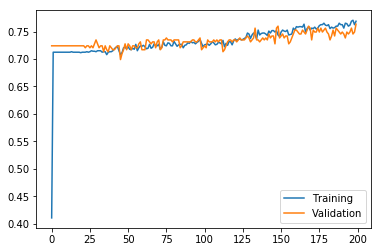

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])

plt.show()

In [39]:
results = model.evaluate(X_test, y_test, verbose=0)
results

[1.2034709190884496, 0.7462437]

In [40]:
model.metrics_names

['loss', 'accuracy']

## 2. Stacked Vanilla RNN
- RNN layers can be stacked to form a deeper network

<img src="https://lh6.googleusercontent.com/rC1DSgjlmobtRxMPFi14hkMdDqSkEkuOX7EW_QrLFSymjasIM95Za2Wf-VwSC1Tq1sjJlOPLJ92q7PTKJh2hjBoXQawM6MQC27east67GFDklTalljlt0cFLZnPMdhp8erzO" style="width: 500px"/>

In [21]:
def stacked_vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), return_sequences = True))   # return_sequences parameter has to be set True to stack
    model.add(SimpleRNN(50, return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [22]:
model = stacked_vanilla_rnn()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 49, 50)            2600      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_1 (Dense)              (None, 46)                2346      
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 9,996
Trainable params: 9,996
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train, verbose=1, batch_size=32, epochs=100, validation_split=0.2)

Train on 1116 samples, validate on 279 samples
Epoch 1/100
1116/1116 [==============================] - 3s 3ms/sample - loss: 2.2400 - accuracy: 0.5833 - val_loss: 1.2696 - val_accuracy: 0.7240
Epoch 2/100
1116/1116 [==============================] - 1s 945us/sample - loss: 1.2546 - accuracy: 0.7124 - val_loss: 1.1227 - val_accuracy: 0.7240
Epoch 3/100
1116/1116 [==============================] - 1s 965us/sample - loss: 1.1876 - accuracy: 0.7124 - val_loss: 1.1047 - val_accuracy: 0.7240
Epoch 4/100
1116/1116 [==============================] - 1s 964us/sample - loss: 1.1573 - accuracy: 0.7124 - val_loss: 1.0620 - val_accuracy: 0.7240
Epoch 5/100
1116/1116 [==============================] - 1s 983us/sample - loss: 1.1253 - accuracy: 0.7124 - val_loss: 1.0567 - val_accuracy: 0.7240
Epoch 6/100
1116/1116 [==============================] - 1s 993us/sample - loss: 1.1208 - accuracy: 0.7124 - val_loss: 1.0413 - val_accuracy: 0.7240
Epoch 7/100
1116/1116 [==============================] - 1s 9

1116/1116 [==============================] - 1s 944us/sample - loss: 0.7364 - accuracy: 0.7590 - val_loss: 1.0203 - val_accuracy: 0.7384
Epoch 56/100
1116/1116 [==============================] - 1s 934us/sample - loss: 0.7403 - accuracy: 0.7572 - val_loss: 1.0018 - val_accuracy: 0.7527
Epoch 57/100
1116/1116 [==============================] - 1s 944us/sample - loss: 0.7281 - accuracy: 0.7536 - val_loss: 1.0167 - val_accuracy: 0.7312
Epoch 58/100
1116/1116 [==============================] - 1s 994us/sample - loss: 0.7244 - accuracy: 0.7563 - val_loss: 1.0226 - val_accuracy: 0.7419
Epoch 59/100
1116/1116 [==============================] - 1s 1ms/sample - loss: 0.7091 - accuracy: 0.7616 - val_loss: 1.0099 - val_accuracy: 0.7455
Epoch 60/100
1116/1116 [==============================] - 1s 935us/sample - loss: 0.7232 - accuracy: 0.7590 - val_loss: 1.0272 - val_accuracy: 0.7312
Epoch 61/100
1116/1116 [==============================] - 1s 948us/sample - loss: 0.7183 - accuracy: 0.7599 - val_l

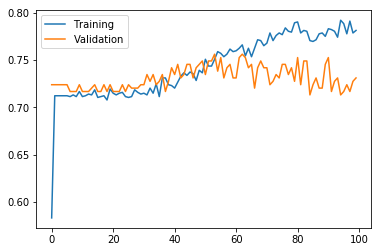

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])

plt.show()

In [25]:
results = model.evaluate(X_test, y_test, verbose=0)
results

[1.166383427650184, 0.754591]

In [26]:
model.metrics_names

['loss', 'accuracy']

## 3. LSTM
- LSTM (long short-term memory) is an improved structure to solve the problem of long-term dependencies

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" style="width: 600px"/>

In [57]:
from tensorflow.keras.layers import LSTM

In [29]:
def lstm():
    model = Sequential()
    model.add(LSTM(50, input_shape = (49,1), return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [32]:
tf.keras.backend.clear_session()

In [33]:
model = lstm()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 46)                2346      
_________________________________________________________________
activation (Activation)      (None, 46)                0         
Total params: 12,746
Trainable params: 12,746
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(X_train, y_train, verbose=1, batch_size=32, epochs=100, validation_split=0.2)

Train on 1116 samples, validate on 279 samples
Epoch 1/100
1116/1116 [==============================] - 3s 3ms/sample - loss: 2.9901 - accuracy: 0.5842 - val_loss: 1.6242 - val_accuracy: 0.6989
Epoch 2/100
1116/1116 [==============================] - 1s 817us/sample - loss: 1.3157 - accuracy: 0.7088 - val_loss: 1.1230 - val_accuracy: 0.7240
Epoch 3/100
1116/1116 [==============================] - 1s 748us/sample - loss: 1.1945 - accuracy: 0.7124 - val_loss: 1.1037 - val_accuracy: 0.7240
Epoch 4/100
1116/1116 [==============================] - 1s 760us/sample - loss: 1.1664 - accuracy: 0.7124 - val_loss: 1.0739 - val_accuracy: 0.7240
Epoch 5/100
1116/1116 [==============================] - 1s 1ms/sample - loss: 1.1425 - accuracy: 0.7124 - val_loss: 1.0589 - val_accuracy: 0.7240
Epoch 6/100
1116/1116 [==============================] - 1s 749us/sample - loss: 1.1080 - accuracy: 0.7124 - val_loss: 0.9762 - val_accuracy: 0.7240
Epoch 7/100
1116/1116 [==============================] - 1s 741

1116/1116 [==============================] - 1s 722us/sample - loss: 0.5788 - accuracy: 0.8495 - val_loss: 0.6370 - val_accuracy: 0.8638
Epoch 56/100
1116/1116 [==============================] - 1s 699us/sample - loss: 0.5491 - accuracy: 0.8557 - val_loss: 0.6394 - val_accuracy: 0.8566
Epoch 57/100
1116/1116 [==============================] - 1s 708us/sample - loss: 0.5556 - accuracy: 0.8566 - val_loss: 0.6372 - val_accuracy: 0.8638
Epoch 58/100
1116/1116 [==============================] - 1s 717us/sample - loss: 0.5577 - accuracy: 0.8495 - val_loss: 0.6598 - val_accuracy: 0.8530
Epoch 59/100
1116/1116 [==============================] - 1s 738us/sample - loss: 0.5613 - accuracy: 0.8575 - val_loss: 0.6280 - val_accuracy: 0.8638
Epoch 60/100
1116/1116 [==============================] - 1s 709us/sample - loss: 0.5474 - accuracy: 0.8530 - val_loss: 0.6500 - val_accuracy: 0.8566
Epoch 61/100
1116/1116 [==============================] - 1s 711us/sample - loss: 0.5426 - accuracy: 0.8566 - val

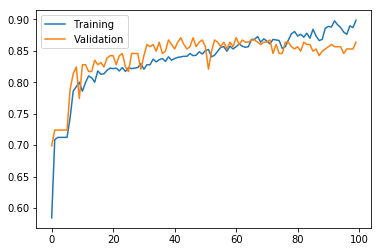

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])

plt.show()

In [36]:
results = model.evaluate(X_test, y_test, verbose=0)
results

[0.820925746218788, 0.8464107]

In [37]:
model.metrics_names

['loss', 'accuracy']

## 4. Stacked LSTM
- LSTM layers can be stacked as well

In [63]:
def stacked_lstm():
    model = Sequential()
    model.add(LSTM(50, input_shape = (49,1), return_sequences = True))
    model.add(LSTM(50, return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [64]:
tf.keras.backend.clear_session()

In [65]:
model = stacked_lstm()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 49, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 46)                2346      
_________________________________________________________________
activation (Activation)      (None, 46)                0         
Total params: 32,946
Trainable params: 32,946
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = model.fit(X_train, y_train, verbose=1, batch_size=32, epochs=100, validation_split=0.2)

Train on 1116 samples, validate on 279 samples
Epoch 1/100
1116/1116 [==============================] - 6s 5ms/sample - loss: 2.1774 - accuracy: 0.6837 - val_loss: 1.2362 - val_accuracy: 0.7240
Epoch 2/100
1116/1116 [==============================] - 2s 1ms/sample - loss: 1.2369 - accuracy: 0.7124 - val_loss: 1.1237 - val_accuracy: 0.7240
Epoch 3/100
1116/1116 [==============================] - 2s 1ms/sample - loss: 1.1866 - accuracy: 0.7124 - val_loss: 1.0954 - val_accuracy: 0.7240
Epoch 4/100
1116/1116 [==============================] - 2s 1ms/sample - loss: 1.1639 - accuracy: 0.7124 - val_loss: 1.0695 - val_accuracy: 0.7240
Epoch 5/100
1116/1116 [==============================] - 2s 1ms/sample - loss: 1.1306 - accuracy: 0.7124 - val_loss: 1.0515 - val_accuracy: 0.7240
Epoch 6/100
1116/1116 [==============================] - 2s 1ms/sample - loss: 1.1079 - accuracy: 0.7124 - val_loss: 1.0127 - val_accuracy: 0.7240
Epoch 7/100
1116/1116 [==============================] - 2s 1ms/sample 

1116/1116 [==============================] - 2s 1ms/sample - loss: 0.6321 - accuracy: 0.8297 - val_loss: 0.6913 - val_accuracy: 0.8387
Epoch 57/100
1116/1116 [==============================] - 2s 1ms/sample - loss: 0.6415 - accuracy: 0.8315 - val_loss: 0.6709 - val_accuracy: 0.8423
Epoch 58/100
1116/1116 [==============================] - 2s 1ms/sample - loss: 0.6131 - accuracy: 0.8280 - val_loss: 0.6617 - val_accuracy: 0.8459
Epoch 59/100
1116/1116 [==============================] - 2s 1ms/sample - loss: 0.6052 - accuracy: 0.8342 - val_loss: 0.6706 - val_accuracy: 0.8459
Epoch 60/100
1116/1116 [==============================] - 2s 1ms/sample - loss: 0.6008 - accuracy: 0.8315 - val_loss: 0.7098 - val_accuracy: 0.8280
Epoch 61/100
1116/1116 [==============================] - 2s 1ms/sample - loss: 0.5969 - accuracy: 0.8333 - val_loss: 0.6539 - val_accuracy: 0.8530
Epoch 62/100
1116/1116 [==============================] - 2s 1ms/sample - loss: 0.5867 - accuracy: 0.8351 - val_loss: 0.6683 

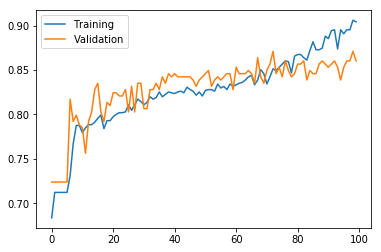

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])

plt.show()

In [68]:
results = model.evaluate(X_test, y_test, verbose=0)
results

[0.7647697465845659, 0.8447412]

In [69]:
model.metrics_names

['loss', 'accuracy']